In [3]:
#test1
!pip install pytorch-tabnet
!pip install torch

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1)
X = df3.drop('Cardiovascular', axis=1)
y = df3['Cardiovascular']

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier()

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
epoch 0  | loss: 0.9789  | val_0_auc: 0.54263 |  0:00:00s


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.76075 | val_0_auc: 0.58351 |  0:00:00s
epoch 2  | loss: 0.61377 | val_0_auc: 0.63555 |  0:00:00s
epoch 3  | loss: 0.58905 | val_0_auc: 0.66914 |  0:00:00s
epoch 4  | loss: 0.54336 | val_0_auc: 0.69891 |  0:00:00s
epoch 5  | loss: 0.53163 | val_0_auc: 0.76276 |  0:00:00s
epoch 6  | loss: 0.51861 | val_0_auc: 0.79878 |  0:00:00s
epoch 7  | loss: 0.4965  | val_0_auc: 0.80966 |  0:00:00s
epoch 8  | loss: 0.46954 | val_0_auc: 0.81989 |  0:00:01s
epoch 9  | loss: 0.44672 | val_0_auc: 0.82929 |  0:00:01s
epoch 10 | loss: 0.43751 | val_0_auc: 0.83291 |  0:00:01s
epoch 11 | loss: 0.43497 | val_0_auc: 0.83568 |  0:00:01s
epoch 12 | loss: 0.41892 | val_0_auc: 0.84413 |  0:00:01s
epoch 13 | loss: 0.41446 | val_0_auc: 0.85193 |  0:00:01s
epoch 14 | loss: 0.41862 | val_0_auc: 0.85393 |  0:00:01s
epoch 15 | loss: 0.39544 | val_0_auc: 0.85638 |  0:00:01s
epoch 16 | loss: 0.38178 | val_0_auc: 0.85788 |  0:00:02s
epoch 17 | loss: 0.39331 | val_0_auc: 0.8627  |  0:00:02s
epoch 18 | los

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [5]:
#20-fold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from pytorch_tabnet.tab_model import TabNetClassifier

pipeline = make_pipeline(StandardScaler(), TabNetClassifier())

cv_scores = cross_val_score(pipeline, X, y, cv=20, scoring='precision')

print(f'Mean precision: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.9702  |  0:00:00s
epoch 1  | loss: 0.74577 |  0:00:00s
epoch 2  | loss: 0.64237 |  0:00:00s
epoch 3  | loss: 0.62102 |  0:00:00s
epoch 4  | loss: 0.53364 |  0:00:00s
epoch 5  | loss: 0.52993 |  0:00:00s
epoch 6  | loss: 0.51235 |  0:00:00s
epoch 7  | loss: 0.50772 |  0:00:00s
epoch 8  | loss: 0.50533 |  0:00:00s
epoch 9  | loss: 0.48056 |  0:00:00s
epoch 10 | loss: 0.46793 |  0:00:00s
epoch 11 | loss: 0.45199 |  0:00:01s
epoch 12 | loss: 0.44479 |  0:00:01s
epoch 13 | loss: 0.4345  |  0:00:01s
epoch 14 | loss: 0.44408 |  0:00:01s
epoch 15 | loss: 0.40506 |  0:00:01s
epoch 16 | loss: 0.38265 |  0:00:01s
epoch 17 | loss: 0.40925 |  0:00:01s
epoch 18 | loss: 0.4162  |  0:00:01s
epoch 19 | loss: 0.40067 |  0:00:01s
epoch 20 | loss: 0.37698 |  0:00:01s
epoch 21 | loss: 0.41893 |  0:00:01s
epoch 22 | loss: 0.39773 |  0:00:02s
epoch 23 | loss: 0.3941  |  0:00:02s
epoch 24 | loss: 0.37229 |  0:00:02s
epoch 25 | loss: 0.37144 |  0:00:02s
epoch 26 | loss: 0.38055 |  0:00:02s
e

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.77509 |  0:00:00s
epoch 2  | loss: 0.68648 |  0:00:00s
epoch 3  | loss: 0.6201  |  0:00:00s
epoch 4  | loss: 0.50882 |  0:00:00s
epoch 5  | loss: 0.52708 |  0:00:00s
epoch 6  | loss: 0.53167 |  0:00:00s
epoch 7  | loss: 0.50008 |  0:00:00s
epoch 8  | loss: 0.47858 |  0:00:00s
epoch 9  | loss: 0.45043 |  0:00:00s
epoch 10 | loss: 0.44746 |  0:00:00s
epoch 11 | loss: 0.4314  |  0:00:01s
epoch 12 | loss: 0.43934 |  0:00:01s
epoch 13 | loss: 0.41909 |  0:00:01s
epoch 14 | loss: 0.43739 |  0:00:01s
epoch 15 | loss: 0.38997 |  0:00:01s
epoch 16 | loss: 0.3871  |  0:00:01s
epoch 17 | loss: 0.39946 |  0:00:01s
epoch 18 | loss: 0.42375 |  0:00:01s
epoch 19 | loss: 0.38971 |  0:00:01s
epoch 20 | loss: 0.3946  |  0:00:01s
epoch 21 | loss: 0.39697 |  0:00:01s
epoch 22 | loss: 0.39996 |  0:00:02s
epoch 23 | loss: 0.37203 |  0:00:02s
epoch 24 | loss: 0.3919  |  0:00:02s
epoch 25 | loss: 0.39137 |  0:00:02s
epoch 26 | loss: 0.38591 |  0:00:02s
epoch 27 | loss: 0.3846  |  0:00:02s
e

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.98379 |  0:00:00s
epoch 1  | loss: 0.76382 |  0:00:00s
epoch 2  | loss: 0.69929 |  0:00:00s
epoch 3  | loss: 0.6563  |  0:00:00s
epoch 4  | loss: 0.59066 |  0:00:00s
epoch 5  | loss: 0.57868 |  0:00:00s
epoch 6  | loss: 0.56235 |  0:00:00s
epoch 7  | loss: 0.52983 |  0:00:00s
epoch 8  | loss: 0.49004 |  0:00:00s
epoch 9  | loss: 0.48582 |  0:00:00s
epoch 10 | loss: 0.47486 |  0:00:00s
epoch 11 | loss: 0.47793 |  0:00:01s
epoch 12 | loss: 0.46105 |  0:00:01s
epoch 13 | loss: 0.43439 |  0:00:01s
epoch 14 | loss: 0.44371 |  0:00:01s
epoch 15 | loss: 0.42461 |  0:00:01s
epoch 16 | loss: 0.40701 |  0:00:01s
epoch 17 | loss: 0.4318  |  0:00:01s
epoch 18 | loss: 0.42617 |  0:00:01s
epoch 19 | loss: 0.40106 |  0:00:01s
epoch 20 | loss: 0.41234 |  0:00:01s
epoch 21 | loss: 0.4151  |  0:00:01s
epoch 22 | loss: 0.40546 |  0:00:02s
epoch 23 | loss: 0.39678 |  0:00:02s
epoch 24 | loss: 0.38789 |  0:00:02s
epoch 25 | loss: 0.38582 |  0:00:02s
epoch 26 | loss: 0.38206 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.77945 |  0:00:00s
epoch 2  | loss: 0.65675 |  0:00:00s
epoch 3  | loss: 0.56167 |  0:00:00s
epoch 4  | loss: 0.52211 |  0:00:00s
epoch 5  | loss: 0.54962 |  0:00:00s
epoch 6  | loss: 0.54093 |  0:00:00s
epoch 7  | loss: 0.52908 |  0:00:00s
epoch 8  | loss: 0.50314 |  0:00:00s
epoch 9  | loss: 0.45691 |  0:00:00s
epoch 10 | loss: 0.4633  |  0:00:00s
epoch 11 | loss: 0.45028 |  0:00:01s
epoch 12 | loss: 0.45196 |  0:00:01s
epoch 13 | loss: 0.43483 |  0:00:01s
epoch 14 | loss: 0.43215 |  0:00:01s
epoch 15 | loss: 0.42672 |  0:00:01s
epoch 16 | loss: 0.39521 |  0:00:01s
epoch 17 | loss: 0.408   |  0:00:01s
epoch 18 | loss: 0.40348 |  0:00:01s
epoch 19 | loss: 0.4046  |  0:00:01s
epoch 20 | loss: 0.39535 |  0:00:01s
epoch 21 | loss: 0.40294 |  0:00:01s
epoch 22 | loss: 0.42278 |  0:00:02s
epoch 23 | loss: 0.3967  |  0:00:02s
epoch 24 | loss: 0.39172 |  0:00:02s
epoch 25 | loss: 0.39435 |  0:00:02s
epoch 26 | loss: 0.38009 |  0:00:02s
epoch 27 | loss: 0.38328 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.01066 |  0:00:00s
epoch 1  | loss: 0.71426 |  0:00:00s
epoch 2  | loss: 0.61617 |  0:00:00s
epoch 3  | loss: 0.55249 |  0:00:00s
epoch 4  | loss: 0.56826 |  0:00:00s
epoch 5  | loss: 0.56366 |  0:00:00s
epoch 6  | loss: 0.50835 |  0:00:00s
epoch 7  | loss: 0.50611 |  0:00:00s
epoch 8  | loss: 0.50191 |  0:00:00s
epoch 9  | loss: 0.46806 |  0:00:01s
epoch 10 | loss: 0.47724 |  0:00:01s
epoch 11 | loss: 0.41867 |  0:00:01s
epoch 12 | loss: 0.45074 |  0:00:01s
epoch 13 | loss: 0.44306 |  0:00:01s
epoch 14 | loss: 0.44523 |  0:00:01s
epoch 15 | loss: 0.4313  |  0:00:01s
epoch 16 | loss: 0.41872 |  0:00:01s
epoch 17 | loss: 0.42425 |  0:00:01s
epoch 18 | loss: 0.42642 |  0:00:02s
epoch 19 | loss: 0.40115 |  0:00:02s
epoch 20 | loss: 0.40055 |  0:00:02s
epoch 21 | loss: 0.40463 |  0:00:02s
epoch 22 | loss: 0.3814  |  0:00:02s
epoch 23 | loss: 0.4066  |  0:00:02s
epoch 24 | loss: 0.39331 |  0:00:02s
epoch 25 | loss: 0.39936 |  0:00:02s
epoch 26 | loss: 0.39458 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.99595 |  0:00:00s
epoch 1  | loss: 0.69875 |  0:00:00s
epoch 2  | loss: 0.60294 |  0:00:00s
epoch 3  | loss: 0.57592 |  0:00:00s
epoch 4  | loss: 0.53542 |  0:00:00s
epoch 5  | loss: 0.54477 |  0:00:00s
epoch 6  | loss: 0.49032 |  0:00:00s
epoch 7  | loss: 0.48641 |  0:00:00s
epoch 8  | loss: 0.46363 |  0:00:00s
epoch 9  | loss: 0.45427 |  0:00:00s
epoch 10 | loss: 0.44706 |  0:00:00s
epoch 11 | loss: 0.415   |  0:00:01s
epoch 12 | loss: 0.42573 |  0:00:01s
epoch 13 | loss: 0.43318 |  0:00:01s
epoch 14 | loss: 0.42097 |  0:00:01s
epoch 15 | loss: 0.43258 |  0:00:01s
epoch 16 | loss: 0.43064 |  0:00:01s
epoch 17 | loss: 0.41999 |  0:00:01s
epoch 18 | loss: 0.41164 |  0:00:01s
epoch 19 | loss: 0.39643 |  0:00:01s
epoch 20 | loss: 0.3935  |  0:00:01s
epoch 21 | loss: 0.40348 |  0:00:01s
epoch 22 | loss: 0.37664 |  0:00:02s
epoch 23 | loss: 0.40801 |  0:00:02s
epoch 24 | loss: 0.40125 |  0:00:02s
epoch 25 | loss: 0.36794 |  0:00:02s
epoch 26 | loss: 0.37538 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.70274 |  0:00:00s
epoch 2  | loss: 0.59337 |  0:00:00s
epoch 3  | loss: 0.56824 |  0:00:00s
epoch 4  | loss: 0.5457  |  0:00:00s
epoch 5  | loss: 0.50469 |  0:00:00s
epoch 6  | loss: 0.48079 |  0:00:00s
epoch 7  | loss: 0.47689 |  0:00:00s
epoch 8  | loss: 0.42759 |  0:00:00s
epoch 9  | loss: 0.41718 |  0:00:00s
epoch 10 | loss: 0.40209 |  0:00:00s
epoch 11 | loss: 0.39833 |  0:00:01s
epoch 12 | loss: 0.41122 |  0:00:01s
epoch 13 | loss: 0.39633 |  0:00:01s
epoch 14 | loss: 0.39859 |  0:00:01s
epoch 15 | loss: 0.37954 |  0:00:01s
epoch 16 | loss: 0.38615 |  0:00:01s
epoch 17 | loss: 0.3702  |  0:00:01s
epoch 18 | loss: 0.37856 |  0:00:01s
epoch 19 | loss: 0.36124 |  0:00:01s
epoch 20 | loss: 0.35778 |  0:00:01s
epoch 21 | loss: 0.36355 |  0:00:01s
epoch 22 | loss: 0.3444  |  0:00:01s
epoch 23 | loss: 0.36269 |  0:00:02s
epoch 24 | loss: 0.34224 |  0:00:02s
epoch 25 | loss: 0.34371 |  0:00:02s
epoch 26 | loss: 0.3527  |  0:00:02s
epoch 27 | loss: 0.32781 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97223 |  0:00:00s
epoch 1  | loss: 0.70469 |  0:00:00s
epoch 2  | loss: 0.60406 |  0:00:00s
epoch 3  | loss: 0.55824 |  0:00:00s
epoch 4  | loss: 0.56635 |  0:00:00s
epoch 5  | loss: 0.53213 |  0:00:00s
epoch 6  | loss: 0.51475 |  0:00:00s
epoch 7  | loss: 0.50667 |  0:00:00s
epoch 8  | loss: 0.44693 |  0:00:00s
epoch 9  | loss: 0.4376  |  0:00:00s
epoch 10 | loss: 0.43411 |  0:00:00s
epoch 11 | loss: 0.38518 |  0:00:01s
epoch 12 | loss: 0.39963 |  0:00:01s
epoch 13 | loss: 0.38747 |  0:00:01s
epoch 14 | loss: 0.39394 |  0:00:01s
epoch 15 | loss: 0.40954 |  0:00:01s
epoch 16 | loss: 0.39325 |  0:00:01s
epoch 17 | loss: 0.377   |  0:00:01s
epoch 18 | loss: 0.37208 |  0:00:01s
epoch 19 | loss: 0.37305 |  0:00:01s
epoch 20 | loss: 0.35487 |  0:00:01s
epoch 21 | loss: 0.36622 |  0:00:01s
epoch 22 | loss: 0.36056 |  0:00:01s
epoch 23 | loss: 0.37692 |  0:00:02s
epoch 24 | loss: 0.35541 |  0:00:02s
epoch 25 | loss: 0.37694 |  0:00:02s
epoch 26 | loss: 0.36115 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.77654 |  0:00:00s
epoch 2  | loss: 0.64499 |  0:00:00s
epoch 3  | loss: 0.57725 |  0:00:00s
epoch 4  | loss: 0.59798 |  0:00:00s
epoch 5  | loss: 0.55682 |  0:00:00s
epoch 6  | loss: 0.49126 |  0:00:00s
epoch 7  | loss: 0.47596 |  0:00:00s
epoch 8  | loss: 0.45595 |  0:00:00s
epoch 9  | loss: 0.47523 |  0:00:00s
epoch 10 | loss: 0.45023 |  0:00:00s
epoch 11 | loss: 0.41859 |  0:00:01s
epoch 12 | loss: 0.42284 |  0:00:01s
epoch 13 | loss: 0.39469 |  0:00:01s
epoch 14 | loss: 0.39735 |  0:00:01s
epoch 15 | loss: 0.4063  |  0:00:01s
epoch 16 | loss: 0.41725 |  0:00:01s
epoch 17 | loss: 0.38291 |  0:00:01s
epoch 18 | loss: 0.37604 |  0:00:01s
epoch 19 | loss: 0.37642 |  0:00:01s
epoch 20 | loss: 0.36603 |  0:00:01s
epoch 21 | loss: 0.36396 |  0:00:01s
epoch 22 | loss: 0.36438 |  0:00:02s
epoch 23 | loss: 0.36856 |  0:00:02s
epoch 24 | loss: 0.36906 |  0:00:02s
epoch 25 | loss: 0.36365 |  0:00:02s
epoch 26 | loss: 0.34791 |  0:00:02s
epoch 27 | loss: 0.3521  |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.98842 |  0:00:00s
epoch 1  | loss: 0.70655 |  0:00:00s
epoch 2  | loss: 0.62347 |  0:00:00s
epoch 3  | loss: 0.55571 |  0:00:00s
epoch 4  | loss: 0.6127  |  0:00:00s
epoch 5  | loss: 0.59998 |  0:00:00s
epoch 6  | loss: 0.55696 |  0:00:00s
epoch 7  | loss: 0.48587 |  0:00:00s
epoch 8  | loss: 0.4606  |  0:00:00s
epoch 9  | loss: 0.47919 |  0:00:00s
epoch 10 | loss: 0.47303 |  0:00:00s
epoch 11 | loss: 0.42923 |  0:00:01s
epoch 12 | loss: 0.42837 |  0:00:01s
epoch 13 | loss: 0.41937 |  0:00:01s
epoch 14 | loss: 0.41174 |  0:00:01s
epoch 15 | loss: 0.42868 |  0:00:01s
epoch 16 | loss: 0.39358 |  0:00:01s
epoch 17 | loss: 0.38101 |  0:00:01s
epoch 18 | loss: 0.3674  |  0:00:01s
epoch 19 | loss: 0.3651  |  0:00:01s
epoch 20 | loss: 0.36541 |  0:00:01s
epoch 21 | loss: 0.38852 |  0:00:01s
epoch 22 | loss: 0.37494 |  0:00:01s
epoch 23 | loss: 0.38141 |  0:00:02s
epoch 24 | loss: 0.3815  |  0:00:02s
epoch 25 | loss: 0.37493 |  0:00:02s
epoch 26 | loss: 0.39874 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.78768 |  0:00:00s
epoch 2  | loss: 0.63947 |  0:00:00s
epoch 3  | loss: 0.61437 |  0:00:00s
epoch 4  | loss: 0.52596 |  0:00:00s
epoch 5  | loss: 0.51712 |  0:00:00s
epoch 6  | loss: 0.50624 |  0:00:00s
epoch 7  | loss: 0.44895 |  0:00:00s
epoch 8  | loss: 0.45744 |  0:00:00s
epoch 9  | loss: 0.4555  |  0:00:00s
epoch 10 | loss: 0.43607 |  0:00:00s
epoch 11 | loss: 0.38503 |  0:00:01s
epoch 12 | loss: 0.40883 |  0:00:01s
epoch 13 | loss: 0.40559 |  0:00:01s
epoch 14 | loss: 0.3873  |  0:00:01s
epoch 15 | loss: 0.40806 |  0:00:01s
epoch 16 | loss: 0.39489 |  0:00:01s
epoch 17 | loss: 0.38088 |  0:00:01s
epoch 18 | loss: 0.3824  |  0:00:01s
epoch 19 | loss: 0.36911 |  0:00:01s
epoch 20 | loss: 0.36928 |  0:00:01s
epoch 21 | loss: 0.36277 |  0:00:01s
epoch 22 | loss: 0.37004 |  0:00:02s
epoch 23 | loss: 0.3657  |  0:00:02s
epoch 24 | loss: 0.36973 |  0:00:02s
epoch 25 | loss: 0.3547  |  0:00:02s
epoch 26 | loss: 0.35247 |  0:00:02s
epoch 27 | loss: 0.35653 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.94477 |  0:00:00s
epoch 1  | loss: 0.74427 |  0:00:00s
epoch 2  | loss: 0.57293 |  0:00:00s
epoch 3  | loss: 0.52969 |  0:00:00s
epoch 4  | loss: 0.53103 |  0:00:00s
epoch 5  | loss: 0.49136 |  0:00:00s
epoch 6  | loss: 0.47686 |  0:00:00s
epoch 7  | loss: 0.45091 |  0:00:00s
epoch 8  | loss: 0.42489 |  0:00:00s
epoch 9  | loss: 0.44475 |  0:00:00s
epoch 10 | loss: 0.42923 |  0:00:00s
epoch 11 | loss: 0.411   |  0:00:01s
epoch 12 | loss: 0.41661 |  0:00:01s
epoch 13 | loss: 0.42408 |  0:00:01s
epoch 14 | loss: 0.39476 |  0:00:01s
epoch 15 | loss: 0.39987 |  0:00:01s
epoch 16 | loss: 0.4044  |  0:00:01s
epoch 17 | loss: 0.38064 |  0:00:01s
epoch 18 | loss: 0.369   |  0:00:01s
epoch 19 | loss: 0.36784 |  0:00:01s
epoch 20 | loss: 0.35521 |  0:00:01s
epoch 21 | loss: 0.37634 |  0:00:01s
epoch 22 | loss: 0.35852 |  0:00:02s
epoch 23 | loss: 0.3734  |  0:00:02s
epoch 24 | loss: 0.36078 |  0:00:02s
epoch 25 | loss: 0.36448 |  0:00:02s
epoch 26 | loss: 0.35993 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.97066 |  0:00:00s
epoch 1  | loss: 0.76233 |  0:00:00s
epoch 2  | loss: 0.61345 |  0:00:00s
epoch 3  | loss: 0.54425 |  0:00:00s
epoch 4  | loss: 0.51978 |  0:00:00s
epoch 5  | loss: 0.54023 |  0:00:00s
epoch 6  | loss: 0.49881 |  0:00:00s
epoch 7  | loss: 0.44885 |  0:00:00s
epoch 8  | loss: 0.46638 |  0:00:00s
epoch 9  | loss: 0.45361 |  0:00:00s
epoch 10 | loss: 0.40868 |  0:00:00s
epoch 11 | loss: 0.41641 |  0:00:01s
epoch 12 | loss: 0.42501 |  0:00:01s
epoch 13 | loss: 0.37865 |  0:00:01s
epoch 14 | loss: 0.38835 |  0:00:01s
epoch 15 | loss: 0.40051 |  0:00:01s
epoch 16 | loss: 0.38406 |  0:00:01s
epoch 17 | loss: 0.36693 |  0:00:01s
epoch 18 | loss: 0.35296 |  0:00:01s
epoch 19 | loss: 0.34557 |  0:00:01s
epoch 20 | loss: 0.34413 |  0:00:01s
epoch 21 | loss: 0.35997 |  0:00:01s
epoch 22 | loss: 0.33938 |  0:00:02s
epoch 23 | loss: 0.37669 |  0:00:02s
epoch 24 | loss: 0.34311 |  0:00:02s
epoch 25 | loss: 0.33683 |  0:00:02s
epoch 26 | loss: 0.34223 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.75806 |  0:00:00s
epoch 2  | loss: 0.65699 |  0:00:00s
epoch 3  | loss: 0.55546 |  0:00:00s
epoch 4  | loss: 0.56196 |  0:00:00s
epoch 5  | loss: 0.53156 |  0:00:00s
epoch 6  | loss: 0.4817  |  0:00:00s
epoch 7  | loss: 0.46375 |  0:00:00s
epoch 8  | loss: 0.45446 |  0:00:00s
epoch 9  | loss: 0.4491  |  0:00:00s
epoch 10 | loss: 0.43104 |  0:00:00s
epoch 11 | loss: 0.41094 |  0:00:01s
epoch 12 | loss: 0.42132 |  0:00:01s
epoch 13 | loss: 0.39995 |  0:00:01s
epoch 14 | loss: 0.40088 |  0:00:01s
epoch 15 | loss: 0.42024 |  0:00:01s
epoch 16 | loss: 0.41596 |  0:00:01s
epoch 17 | loss: 0.3706  |  0:00:01s
epoch 18 | loss: 0.36529 |  0:00:01s
epoch 19 | loss: 0.34955 |  0:00:01s
epoch 20 | loss: 0.3686  |  0:00:01s
epoch 21 | loss: 0.37969 |  0:00:01s
epoch 22 | loss: 0.36141 |  0:00:02s
epoch 23 | loss: 0.39007 |  0:00:02s
epoch 24 | loss: 0.36486 |  0:00:02s
epoch 25 | loss: 0.35331 |  0:00:02s
epoch 26 | loss: 0.37031 |  0:00:02s
epoch 27 | loss: 0.35744 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.98065 |  0:00:00s
epoch 1  | loss: 0.75999 |  0:00:00s
epoch 2  | loss: 0.62761 |  0:00:00s
epoch 3  | loss: 0.53494 |  0:00:00s
epoch 4  | loss: 0.53484 |  0:00:00s
epoch 5  | loss: 0.54383 |  0:00:00s
epoch 6  | loss: 0.50347 |  0:00:00s
epoch 7  | loss: 0.49326 |  0:00:00s
epoch 8  | loss: 0.45253 |  0:00:00s
epoch 9  | loss: 0.4505  |  0:00:00s
epoch 10 | loss: 0.44088 |  0:00:00s
epoch 11 | loss: 0.42049 |  0:00:01s
epoch 12 | loss: 0.4131  |  0:00:01s
epoch 13 | loss: 0.40043 |  0:00:01s
epoch 14 | loss: 0.41396 |  0:00:01s
epoch 15 | loss: 0.41104 |  0:00:01s
epoch 16 | loss: 0.40246 |  0:00:01s
epoch 17 | loss: 0.38713 |  0:00:01s
epoch 18 | loss: 0.36943 |  0:00:01s
epoch 19 | loss: 0.37898 |  0:00:01s
epoch 20 | loss: 0.39186 |  0:00:01s
epoch 21 | loss: 0.36286 |  0:00:01s
epoch 22 | loss: 0.36085 |  0:00:02s
epoch 23 | loss: 0.3862  |  0:00:02s
epoch 24 | loss: 0.3605  |  0:00:02s
epoch 25 | loss: 0.35498 |  0:00:02s
epoch 26 | loss: 0.37284 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.96993 |  0:00:00s
epoch 1  | loss: 0.75137 |  0:00:00s
epoch 2  | loss: 0.5958  |  0:00:00s
epoch 3  | loss: 0.56009 |  0:00:00s
epoch 4  | loss: 0.55259 |  0:00:00s
epoch 5  | loss: 0.54309 |  0:00:00s
epoch 6  | loss: 0.51379 |  0:00:00s
epoch 7  | loss: 0.45691 |  0:00:00s
epoch 8  | loss: 0.43958 |  0:00:00s
epoch 9  | loss: 0.43719 |  0:00:00s
epoch 10 | loss: 0.43742 |  0:00:00s
epoch 11 | loss: 0.43102 |  0:00:01s
epoch 12 | loss: 0.42867 |  0:00:01s
epoch 13 | loss: 0.38215 |  0:00:01s
epoch 14 | loss: 0.41173 |  0:00:01s
epoch 15 | loss: 0.41742 |  0:00:01s
epoch 16 | loss: 0.41289 |  0:00:01s
epoch 17 | loss: 0.38434 |  0:00:01s
epoch 18 | loss: 0.37374 |  0:00:01s
epoch 19 | loss: 0.36115 |  0:00:01s
epoch 20 | loss: 0.36363 |  0:00:01s
epoch 21 | loss: 0.37967 |  0:00:01s
epoch 22 | loss: 0.35211 |  0:00:02s
epoch 23 | loss: 0.36086 |  0:00:02s
epoch 24 | loss: 0.36601 |  0:00:02s
epoch 25 | loss: 0.3324  |  0:00:02s
epoch 26 | loss: 0.37393 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.75389 |  0:00:00s
epoch 2  | loss: 0.60969 |  0:00:00s
epoch 3  | loss: 0.54026 |  0:00:00s
epoch 4  | loss: 0.49937 |  0:00:00s
epoch 5  | loss: 0.50632 |  0:00:00s
epoch 6  | loss: 0.50096 |  0:00:00s
epoch 7  | loss: 0.44064 |  0:00:00s
epoch 8  | loss: 0.45448 |  0:00:00s
epoch 9  | loss: 0.44114 |  0:00:00s
epoch 10 | loss: 0.40862 |  0:00:00s
epoch 11 | loss: 0.38532 |  0:00:01s
epoch 12 | loss: 0.40311 |  0:00:01s
epoch 13 | loss: 0.37891 |  0:00:01s
epoch 14 | loss: 0.36628 |  0:00:01s
epoch 15 | loss: 0.39154 |  0:00:01s
epoch 16 | loss: 0.37184 |  0:00:01s
epoch 17 | loss: 0.34939 |  0:00:01s
epoch 18 | loss: 0.33687 |  0:00:01s
epoch 19 | loss: 0.3639  |  0:00:01s
epoch 20 | loss: 0.35953 |  0:00:01s
epoch 21 | loss: 0.34128 |  0:00:02s
epoch 22 | loss: 0.33374 |  0:00:02s
epoch 23 | loss: 0.3598  |  0:00:02s
epoch 24 | loss: 0.35725 |  0:00:02s
epoch 25 | loss: 0.34172 |  0:00:02s
epoch 26 | loss: 0.33687 |  0:00:02s
epoch 27 | loss: 0.33422 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.99289 |  0:00:00s
epoch 1  | loss: 0.79818 |  0:00:00s
epoch 2  | loss: 0.66334 |  0:00:00s
epoch 3  | loss: 0.5702  |  0:00:00s
epoch 4  | loss: 0.51917 |  0:00:00s
epoch 5  | loss: 0.52171 |  0:00:00s
epoch 6  | loss: 0.53133 |  0:00:00s
epoch 7  | loss: 0.45948 |  0:00:00s
epoch 8  | loss: 0.4766  |  0:00:00s
epoch 9  | loss: 0.4744  |  0:00:00s
epoch 10 | loss: 0.45436 |  0:00:00s
epoch 11 | loss: 0.42065 |  0:00:01s
epoch 12 | loss: 0.44609 |  0:00:01s
epoch 13 | loss: 0.40935 |  0:00:01s
epoch 14 | loss: 0.3951  |  0:00:01s
epoch 15 | loss: 0.41126 |  0:00:01s
epoch 16 | loss: 0.38206 |  0:00:01s
epoch 17 | loss: 0.38812 |  0:00:01s
epoch 18 | loss: 0.37436 |  0:00:01s
epoch 19 | loss: 0.3748  |  0:00:01s
epoch 20 | loss: 0.38791 |  0:00:01s
epoch 21 | loss: 0.37957 |  0:00:01s
epoch 22 | loss: 0.37612 |  0:00:01s
epoch 23 | loss: 0.37981 |  0:00:02s
epoch 24 | loss: 0.36465 |  0:00:02s
epoch 25 | loss: 0.35569 |  0:00:02s
epoch 26 | loss: 0.37389 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.7416  |  0:00:00s
epoch 2  | loss: 0.58724 |  0:00:00s
epoch 3  | loss: 0.50956 |  0:00:00s
epoch 4  | loss: 0.48676 |  0:00:00s
epoch 5  | loss: 0.48658 |  0:00:00s
epoch 6  | loss: 0.50937 |  0:00:00s
epoch 7  | loss: 0.44207 |  0:00:00s
epoch 8  | loss: 0.44997 |  0:00:00s
epoch 9  | loss: 0.41749 |  0:00:00s
epoch 10 | loss: 0.41457 |  0:00:01s
epoch 11 | loss: 0.39215 |  0:00:01s
epoch 12 | loss: 0.41643 |  0:00:01s
epoch 13 | loss: 0.4034  |  0:00:01s
epoch 14 | loss: 0.36632 |  0:00:01s
epoch 15 | loss: 0.41107 |  0:00:01s
epoch 16 | loss: 0.38575 |  0:00:01s
epoch 17 | loss: 0.35432 |  0:00:01s
epoch 18 | loss: 0.34407 |  0:00:01s
epoch 19 | loss: 0.34269 |  0:00:01s
epoch 20 | loss: 0.35707 |  0:00:01s
epoch 21 | loss: 0.34407 |  0:00:01s
epoch 22 | loss: 0.34372 |  0:00:02s
epoch 23 | loss: 0.35764 |  0:00:02s
epoch 24 | loss: 0.32063 |  0:00:02s
epoch 25 | loss: 0.33559 |  0:00:02s
epoch 26 | loss: 0.33915 |  0:00:02s
epoch 27 | loss: 0.31933 |  0:00:02s
e

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.01549 |  0:00:00s
epoch 1  | loss: 0.74761 |  0:00:00s
epoch 2  | loss: 0.61642 |  0:00:00s
epoch 3  | loss: 0.59168 |  0:00:00s
epoch 4  | loss: 0.5222  |  0:00:00s
epoch 5  | loss: 0.4855  |  0:00:00s
epoch 6  | loss: 0.48786 |  0:00:00s
epoch 7  | loss: 0.48499 |  0:00:00s
epoch 8  | loss: 0.50096 |  0:00:00s
epoch 9  | loss: 0.47945 |  0:00:00s
epoch 10 | loss: 0.45594 |  0:00:01s
epoch 11 | loss: 0.4146  |  0:00:01s
epoch 12 | loss: 0.44855 |  0:00:01s
epoch 13 | loss: 0.39557 |  0:00:01s
epoch 14 | loss: 0.40561 |  0:00:01s
epoch 15 | loss: 0.4305  |  0:00:01s
epoch 16 | loss: 0.40824 |  0:00:01s
epoch 17 | loss: 0.38136 |  0:00:01s
epoch 18 | loss: 0.37858 |  0:00:01s
epoch 19 | loss: 0.36445 |  0:00:01s
epoch 20 | loss: 0.385   |  0:00:01s
epoch 21 | loss: 0.36712 |  0:00:02s
epoch 22 | loss: 0.36987 |  0:00:02s
epoch 23 | loss: 0.36477 |  0:00:02s
epoch 24 | loss: 0.37005 |  0:00:02s
epoch 25 | loss: 0.35552 |  0:00:02s
epoch 26 | loss: 0.36252 |  0:00:02s
e

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.9789  | val_0_auc: 0.54263 |  0:00:00s
epoch 1  | loss: 0.76075 | val_0_auc: 0.58351 |  0:00:00s
epoch 2  | loss: 0.61377 | val_0_auc: 0.63555 |  0:00:00s
epoch 3  | loss: 0.58905 | val_0_auc: 0.66914 |  0:00:00s
epoch 4  | loss: 0.54336 | val_0_auc: 0.69891 |  0:00:00s
epoch 5  | loss: 0.53163 | val_0_auc: 0.76276 |  0:00:00s
epoch 6  | loss: 0.51861 | val_0_auc: 0.79878 |  0:00:00s
epoch 7  | loss: 0.4965  | val_0_auc: 0.80966 |  0:00:00s
epoch 8  | loss: 0.46954 | val_0_auc: 0.81989 |  0:00:01s
epoch 9  | loss: 0.44672 | val_0_auc: 0.82929 |  0:00:01s
epoch 10 | loss: 0.43751 | val_0_auc: 0.83291 |  0:00:01s
epoch 11 | loss: 0.43497 | val_0_auc: 0.83568 |  0:00:01s
epoch 12 | loss: 0.41892 | val_0_auc: 0.84413 |  0:00:01s
epoch 13 | loss: 0.41446 | val_0_auc: 0.85193 |  0:00:01s
epoch 14 | loss: 0.41862 | val_0_auc: 0.85393 |  0:00:01s
epoch 15 | loss: 0.39544 | val_0_auc: 0.85638 |  0:00:01s
epoch 16 | loss: 0.38178 | val_0_auc: 0.85788 |  0:00:01s
epoch 17 | los

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


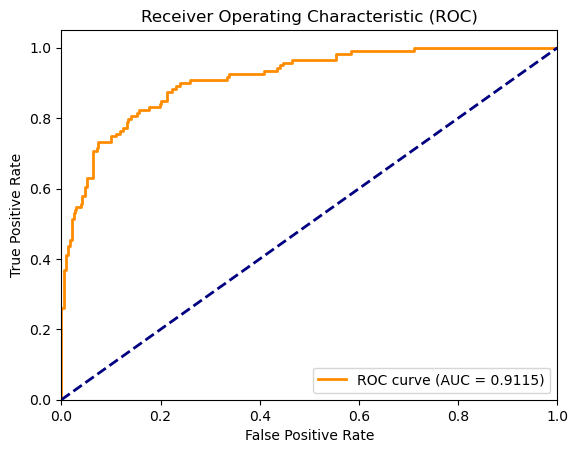

In [6]:
#drow ROC
!pip install pytorch-tabnet
!pip install torch

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1) 
X = df3.drop('Cardiovascular', axis=1)  
y = df3['Cardiovascular']


X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier()

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 对角线参考线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Selected top 10 feature indices: [ 0  2  3  5  9 13 20 24 26 28]
epoch 0  | loss: 0.75953 | val_0_auc: 0.64123 |  0:00:00s


C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 1  | loss: 0.58218 | val_0_auc: 0.72193 |  0:00:00s
epoch 2  | loss: 0.50408 | val_0_auc: 0.74065 |  0:00:00s
epoch 3  | loss: 0.46986 | val_0_auc: 0.76515 |  0:00:00s
epoch 4  | loss: 0.46588 | val_0_auc: 0.79959 |  0:00:00s
epoch 5  | loss: 0.44307 | val_0_auc: 0.83145 |  0:00:00s
epoch 6  | loss: 0.42363 | val_0_auc: 0.84548 |  0:00:00s
epoch 7  | loss: 0.4246  | val_0_auc: 0.85513 |  0:00:00s
epoch 8  | loss: 0.39435 | val_0_auc: 0.85485 |  0:00:00s
epoch 9  | loss: 0.39416 | val_0_auc: 0.85855 |  0:00:00s
epoch 10 | loss: 0.39427 | val_0_auc: 0.86559 |  0:00:01s
epoch 11 | loss: 0.35877 | val_0_auc: 0.86673 |  0:00:01s
epoch 12 | loss: 0.37829 | val_0_auc: 0.8655  |  0:00:01s
epoch 13 | loss: 0.36857 | val_0_auc: 0.86393 |  0:00:01s
epoch 14 | loss: 0.3582  | val_0_auc: 0.86719 |  0:00:01s
epoch 15 | loss: 0.35587 | val_0_auc: 0.86978 |  0:00:01s
epoch 16 | loss: 0.36501 | val_0_auc: 0.87249 |  0:00:01s
epoch 17 | loss: 0.35937 | val_0_auc: 0.87397 |  0:00:01s
epoch 18 | los

C:\Users\15982\AppData\Roaming\Python\Python310\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.8776
Precision: 0.8409
Recall: 0.6218


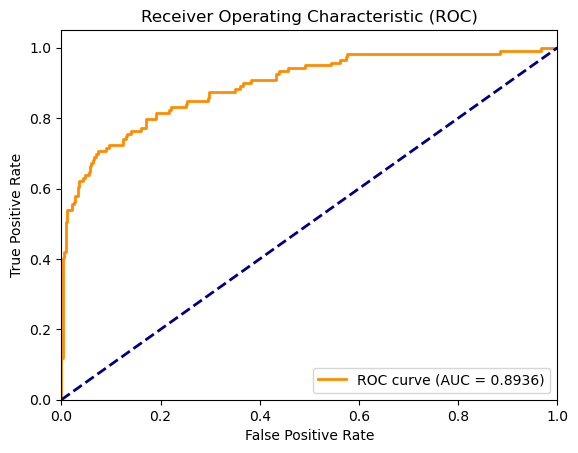

In [7]:
#select 10 best
!pip install pytorch-tabnet
!pip install torch

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df3 = pd.read_csv('C:\\Users\\15982\\Desktop\\training_data.csv')
df3 = df3.drop(['LOG_ID', 'PAT_ID', 'MRN'], axis=1)  
X = df3.drop('Cardiovascular', axis=1)  
y = df3['Cardiovascular']  

X = X.to_numpy()
y = y.to_numpy()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)  
X_rfe = rfe.fit_transform(X, y)

selected_features = rfe.get_support(indices=True)
print(f"Selected top 10 feature indices: {selected_features}")

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = TabNetClassifier()

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

precision = precision_score(y_test, preds, average='binary')

recall = recall_score(y_test, preds, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()